<a href="https://colab.research.google.com/github/xxxnmxhj00/Deep-Learning/blob/main/6_2%20%EC%88%9C%ED%99%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D_(RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


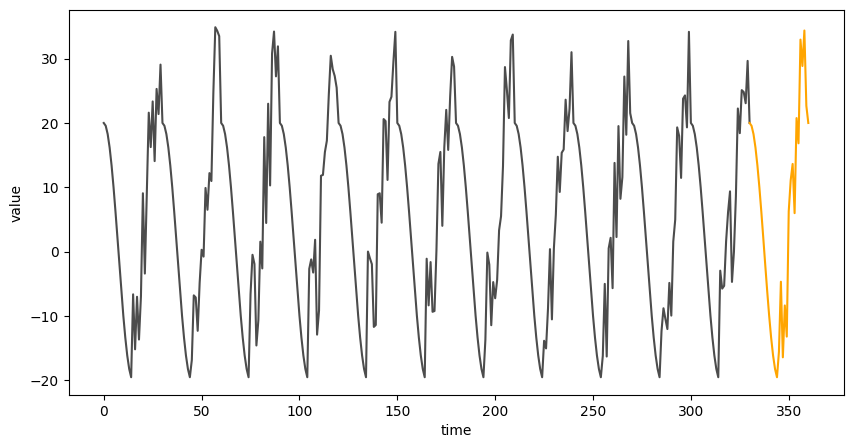

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2020)

time = np.arange(30 * 12 + 1)
month_time = (time % 30) / 30
time_series = 20 * np.where(month_time <0.5,
                            np.cos(2 * np.pi * month_time),
                            np.cos(2 * np.pi * month_time) + np.random.random(361))
plt.figure(figsize=(10,5))
plt.xlabel('time')
plt.ylabel('value')

plt.plot(np.arange(0, 30 * 11 + 1),
         time_series[:30 * 11 + 1],
         color = 'black', alpha = 0.7)

plt.plot(np.arange(30 * 11 , 30 * 12 + 1),
                    time_series[30 * 11:],
                    color = 'orange')

In [ ]:
def make_sequence(time_series, n):
  x_train, y_train = list(), list()

  for i in range(len(time_series)):
      x = time_series[i:(i + n)]
      if (i + n) < len(time_series):
        x_train.append(x)
        y_train.append(time_series[i + n])
      else:
        break

  return np.array(x_train), np.array(y_train)

In [ ]:
time_series[:10]

array([20.        , 19.56295201, 18.27090915, 16.18033989, 13.38261213,
       10.        ,  6.18033989,  2.09056927, -2.09056927, -6.18033989])

In [ ]:
n = 10 # 주기 설정
x_train, y_train = make_sequence(time_series, n)
print(f'x_train {x_train.shape}, y_train{y_train.shape}')

x_train (351, 10), y_train(351,)


In [ ]:
x_train = x_train.reshape(-1, n ,1)
y_train = y_train.reshape(-1, 1)
print(f'x_train {x_train.shape}, y_train{y_train.shape}')

x_train (351, 10, 1), y_train(351, 1)


In [ ]:
from functools import partial
# 학습용 및 테스트용 데이터 분리
patial_x_train = x_train[:30 * 11]
patial_y_train = y_train[:30 * 11]
x_test = x_train[30 * 11:]
y_test = y_train[30 * 11:]
print('partial_train', partial_x_train.shape, partial_y_train.shape)
print('test', x_test.shape, y_test.shape)

partial_train (330, 10, 1) (330, 1)
test (21, 10, 1) (21, 1)


Simple rnn

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense, Input
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Input(shape=(n, 1)))
model.add(SimpleRNN(units = 32, activation='tanh',))
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 32)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(patial_x_train, patial_y_train, epochs=200, batch_size = 12)

Epoch 1/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 14.7599
Epoch 2/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 14.3483
Epoch 3/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 12.1757
Epoch 4/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.4852
Epoch 5/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.2444
Epoch 6/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.6309
Epoch 7/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.6075
Epoch 8/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.3704
Epoch 9/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.8252
Epoch 10/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.9817
Epoch 11/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.9786
Epoch 12/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.0250
Epoch 13/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.2782
Epoch 14/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.5459
Epoch 15/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


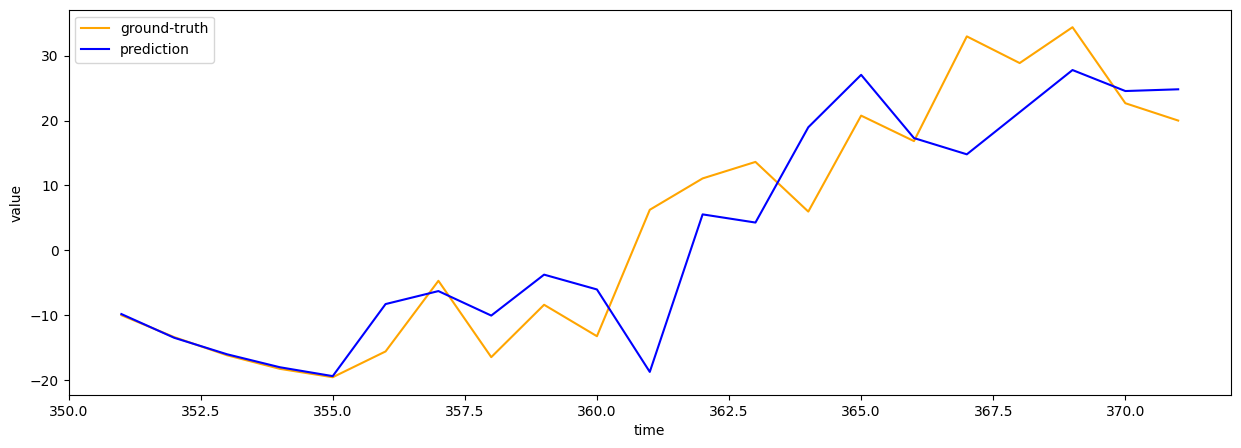

In [ ]:
pred = model.predict(x_test)

pred_range = np.arange(len(y_train),len(y_train) + len(pred))

plt.figure(figsize=(15,5))
plt.xlabel('time')
plt.ylabel('value')
plt.plot(pred_range, y_test.reshape(-1), color = 'orange', label = 'ground-truth')
plt.plot(pred_range, pred.reshape(-1), color = 'blue', label = 'prediction')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.datasets import imdb

num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

SimpleRNN

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, Input
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(input_dim = num_words, output_dim = 32))

model.add(SimpleRNN(32, return_sequences=True, dropout=0.15, recurrent_dropout=0.15))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=32,
                    validation_split=0.2)


Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 161s 251ms/step - acc: 0.5137 - loss: 0.7031 - val_acc: 0.5820 - val_loss: 0.6719
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 159s 255ms/step - acc: 0.5822 - loss: 0.6657 - val_acc: 0.6144 - val_loss: 0.6386
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 247ms/step - acc: 0.6731 - loss: 0.5955 - val_acc: 0.6194 - val_loss: 0.6430
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 247ms/step - acc: 0.7496 - loss: 0.5096 - val_acc: 0.6446 - val_loss: 0.6455
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 249ms/step - acc: 0.8040 - loss: 0.4243 - val_acc: 0.7202 - val_loss: 0.5873
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 250ms/step - acc: 0.8163 - loss: 0.4118 - val_acc: 0.6984 - val_loss: 0.6446
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 248ms/step - acc: 0.8646 - loss: 0.3261 - val_acc: 0.7562 - val_loss: 0.5617
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 247ms/step - acc: 0.8762 - loss: 0.2976 - val_acc: 0.7364 - val_loss: 0.6251
Epoch 9/15
625/625 ━━━━━

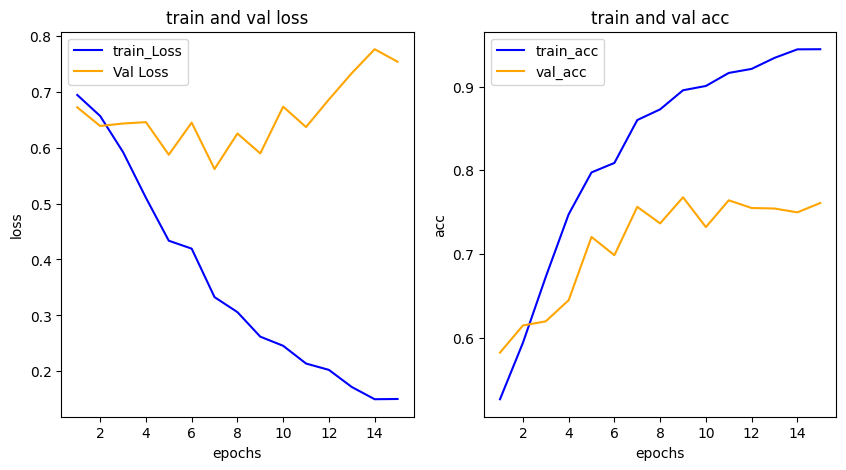

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_Loss')
ax1.plot(epochs, val_loss, color='orange', label='Val Loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()